### Урок 12. Домашняя работа

**Задача высокого уровня** В реализацию функции `gradient` добавьте параметр $\lambda$, чтобы получить регуляризованный градиентный спуск

Формула поменяется следующим образом:
$$
\left\{
\begin{array}{cc}
\frac{\partial L}{\partial w_0} = \frac{2}{n}\cdot(-1)\cdot \sum_{i=1}^{n} (1\cdot \left(y_i - \sum_{j=1}^{m}w_jx_j^i\right) + \lambda\cdot 2\cdot w_0)&\\
\frac{\partial L}{\partial w_k} = \frac{2}{n}\cdot(-1)\cdot \sum_{i=1}^{n} (x_k^i \cdot\left(y_i - \sum_{j=1}^{m}w_jx_j^i\right) + \lambda\cdot 2\cdot w_k)& k\neq 0 \\
\end{array}
\right.
$$

In [81]:
import numpy as np
import pandas as pd
from scipy.spatial import distance
import matplotlib.pyplot as plt

In [82]:
data = pd.read_csv('non_linear.csv', sep=',')
data = data[(data.x_train > 1) & (data.x_train < 5)].copy()
data.head()

,x_train,y_train
5,1.182421,1.860341
6,1.251605,1.878928
7,1.270474,2.430015
8,1.402553,2.327856
9,1.427711,2.203649


In [83]:


def gradient (X, y, eta, w_current:np.array, lambda_)->np.array:
    """gradient for linear regression"""
    n=X.shape[0] # number of train examples
    y_hat=X.dot(w_current.T) # predict linear regression results
    error = y - y_hat # deviation
    grad=(np.multiply(X,error).sum(axis=0)*(-1.0)+2*lambda_*w_current)*2.0/n #gradient for linear regression
    return grad, error

In [84]:
def eval_w_next(X, y, eta, w_current, lambda_):
    """Next step"""
    grad, error=gradient(X,y,eta, w_current, lambda_)
    w_next=w_current-eta*grad # weights at next iteration
    weight_evolution=distance.euclidean(w_current, w_next) # weights change
    return (w_next, weight_evolution, grad)

In [85]:
def gradient_descent(X:np.array, y:np.array, eta=0.01, epsilon=0.001, lambda_=0.1)->np.array:
    m=X.shape[1] # features number (gradient dimension)
    w=np.random.random(m).reshape(1,-1) # initialize weights with random numbers
    w_next, weight_evolution, grad=eval_w_next(X, y, eta, w, lambda_)
    step=0
    while weight_evolution>epsilon:
        w=w_next
        w_next, weight_evolution, grad=eval_w_next(X, y, eta, w, lambda_)
        step+=1
        if step % 100 ==0:
            print("step %s |w-w_next|=%.5f, grad=%s" % (step, weight_evolution, grad))
    return w

In [86]:
X = data['x_train'].values.reshape(-1, 1)
n = X.shape[0]
# add trivial feature w_0, column of ones
X = np.hstack([np.ones(n).reshape(-1,1), X])
w = gradient_descent(X, data['y_train'].values.reshape(-1, 1), eta=0.008, lambda_=0.1)

step 100 |w-w_next|=0.00494, grad=[[-0.59278664  0.17124428]]
step 200 |w-w_next|=0.00402, grad=[[-0.48324063  0.13959861]]
step 300 |w-w_next|=0.00328, grad=[[-0.39393855  0.11380101]]
step 400 |w-w_next|=0.00267, grad=[[-0.32113935  0.09277077]]
step 500 |w-w_next|=0.00218, grad=[[-0.26179332  0.07562688]]
step 600 |w-w_next|=0.00178, grad=[[-0.21341434  0.06165116]]
step 700 |w-w_next|=0.00145, grad=[[-0.17397571  0.05025812]]
step 800 |w-w_next|=0.00118, grad=[[-0.14182528  0.0409705 ]]


In [87]:
support = np.linspace(X.min(), X.max(), num=100)
y_hat = np.hstack([
    np.ones(support.size).reshape(-1, 1),
    support.reshape(-1, 1)
]).dot(w.T)

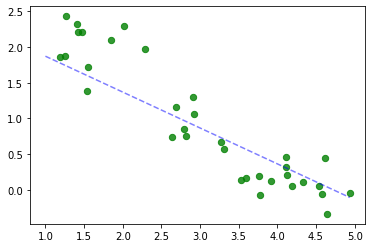

In [88]:
plt.plot(support, y_hat, 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
plt.show()